In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-10-11 16:21:53.874795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-11 16:21:53.893886: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-11 16:21:53.899550: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-11 16:21:53.915003: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-11 16:21:55.550280: W tensorflow/compiler/tf2

In [2]:
training_dir = "dataset/Training"
validation_dir = "dataset/Validation"
input_shape = (224,224,3)

In [3]:
training_data_generator = ImageDataGenerator(
                                             rescale = 1.0/255,
                                             horizontal_flip = True,
                                             vertical_flip = True,
                                             rotation_range = 45,
                                             height_shift_range = 0.2,
                                             width_shift_range = 0.2,
                                             fill_mode = "nearest"
                                             )

validation_data_generator = ImageDataGenerator(
                                               rescale = 1.0/255
                                               )

train_generator = training_data_generator.flow_from_directory(
    training_dir,
    target_size =(224,224),
    class_mode = "categorical",
    batch_size = 64
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size =(224,224),
    class_mode = "categorical",
    batch_size = 16
)

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [5]:
import keras
from keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.optimizers import Adam

def fireNet(input_shape):
    model = keras.models.Sequential([
                                     layers.Conv2D(96, (11,11), strides=(4,4), activation="relu", input_shape=input_shape),
                                     layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

                                     layers.Conv2D(256, (5,5), activation="relu", input_shape=input_shape),
                                     layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

                                     layers.Conv2D(512, (5,5), activation="relu",),
                                     layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

                                     layers.Flatten(),
                                     layers.Dropout(0.3),

                                     layers.Dense(2048, activation="relu"),
                                     layers.Dropout(0.3),

                                     layers.Dense(1024, activation="relu"),
                                     layers.Dropout(0.3),

                                     layers.Dense(2, activation="softmax")
                                     ])
    
    model.compile(
        loss = "categorical_crossentropy",
        optimizer = Adam(learning_rate = 1e-4),
        metrics =["acc"]

    )
    return model

In [6]:
model = fireNet(input_shape)
model.summary()

/home/isu-researcher/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 512)      │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,223,490 (39.00 MB)

 Trainable params: 10,223,490 (39.00 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch= 15,
    epochs=50,
    validation_data=validation_generator,
   # validation_steps=15,
   validation_steps = validation_generator.samples // validation_generator.batch_size
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - acc: 0.9475 - loss: 0.1376 - val_acc: 0.9509 - val_loss: 0.1314
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9688 - loss: 0.0962 - val_acc: 1.0000 - val_loss: 0.0492
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9517 - loss: 0.1264 - val_acc: 0.9598 - val_loss: 0.1184
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9844 - loss: 0.0558 - val_acc: 0.9333 - val_loss: 0.1825
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - acc: 0.9630 - loss: 0.1241 - val_acc: 0.9598 - val_loss: 0.1407
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9219 - loss: 0.2017 - val_acc: 0.9333 - val_loss: 0.0732
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - acc: 0.9498 - loss: 0.1422 - val_acc: 0.9464 - val_loss: 0.1584
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9375 - loss: 0.0861 - val_acc: 1.0000 - val_loss: 0.0470
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - acc: 0.9518 - loss: 0.1343 - val_acc: 0.9554 - val_loss: 0.1510
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9844 - loss: 0.0833 - val_acc: 1.0000 - val_loss: 0.0783
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9598 - loss: 0.1164 - 

2024-10-11 17:13:03.749899: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - acc: 0.9276 - loss: 0.1429 - val_acc: 0.9375 - val_loss: 0.1644
Epoch 30/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9531 - loss: 0.1498 - val_acc: 1.0000 - val_loss: 0.0465
Epoch 31/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - acc: 0.9543 - loss: 0.1165 - val_acc: 0.9598 - val_loss: 0.1483
Epoch 32/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9375 - loss: 0.1362 - val_acc: 0.9333 - val_loss: 0.1250
Epoch 33/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - acc: 0.9690 - loss: 0.0883 - val_acc: 0.9643 - val_loss: 0.1237
Epoch 34/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9531 - loss: 0.1094 - val_acc: 0.9333 - val_loss: 0.2205
Epoch 35/50


2024-10-11 17:14:55.326127: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:111: Filling up shuffle buffer (this may take a while): 7 of 8
2024-10-11 17:14:56.581159: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - acc: 0.9654 - loss: 0.1020 - val_acc: 0.9509 - val_loss: 0.1622
Epoch 36/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9844 - loss: 0.0402 - val_acc: 1.0000 - val_loss: 0.0285
Epoch 37/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - acc: 0.9741 - loss: 0.0842 - val_acc: 0.9643 - val_loss: 0.1279
Epoch 38/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.9219 - loss: 0.1307 - val_acc: 1.0000 - val_loss: 0.0526
Epoch 39/50


2024-10-11 17:16:06.017395: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:111: Filling up shuffle buffer (this may take a while): 7 of 8
2024-10-11 17:16:06.945281: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - acc: 0.9604 - loss: 0.1042 - val_acc: 0.9643 - val_loss: 0.1064
Epoch 40/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9531 - loss: 0.1626 - val_acc: 0.8667 - val_loss: 0.4216
Epoch 41/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - acc: 0.9684 - loss: 0.1090 - val_acc: 0.9643 - val_loss: 0.1304
Epoch 42/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 0.0758 - val_acc: 1.0000 - val_loss: 0.0558
Epoch 43/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - acc: 0.9743 - loss: 0.0812 - val_acc: 0.9554 - val_loss: 0.1651
Epoch 44/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9500 - loss: 0.3281 - val_acc: 0.9333 - val_loss: 0.1459
Epoch 45/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - acc: 0.9652 - loss: 0.1029 - val_acc: 0.9598 - val_loss: 0.1214
Epoch 46/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9844 - loss: 0.0520 - val_acc: 0.9333 - val_loss: 0.2750
Epoch 47/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - acc: 0.9744 - loss: 0.

ValueError: '0' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

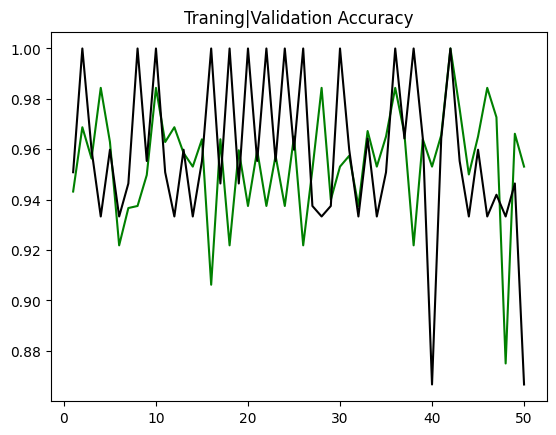

In [17]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

#epochs = range(1,101)
epochs = range(1, len(val_acc) + 1)


plt.plot(epochs, acc, "g",label="Training Accuracy")
plt.plot(epochs, val_acc, "black",label="Validation Accuracy")
plt.title("Traning|Validation Accuracy")
#plt.legend(loc ="0")
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1)
plt.figure()
plt.show()

plt.plot(epochs, loss, "r",label="Training Loss")
plt.plot(epochs, val_loss, "blue",label="Validation Loss")
plt.title("Traning|Validation Loss")
#plt.legend(loc ="0")
plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1)


plt.figure()
plt.show()

In [ ]:
model.save("./models/fire_model.h5")

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

In [ ]:
model = load_model("./models/fire_model.h5")
path = "./test/test.jpg"

In [ ]:
test_img = cv2.imread(path)
img = np.asarray(test_img)

img = cv2.resize(img,(224, 224))
img = img/255
img = np.expand_dims(img,axis=0)
print(img.shape)

predict = model.predict(img)
#pred = np.max(predict) or
#pred = max(predict[0])
pred = np.argmax(predict[0])
probability_ = f"%{probability*100:.2f}"

print(predict, pred, probability, probability_)

if pred == 1:
    label = "Fire"
else:
    label = "Neutral"

font =cv2.FONT_HERSHEY_SIMPLEX
color =(0,255,0)

cv2.putText(test_img, label, (35,60), font, 1, color, 2)
cv2.putText(test_img, probability_, (35,120), font, 1, color,2)

cv2.imshow("Prediction", test_img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [ ]:
path ="test/test.jpg"
test_img = cv2.imread(path)
img = np.asarray(test_img)

img = cv2.resize(img, (224,224))
img = img/255
img = np.expand_dims(img, axis = 0)
print(img.shape)

predict = model.predict(img)
pred = np.argmax(predict[0])
probability = predict[0][pred]

probability_ = f"%{probability*100:.2f}"

print(predict, pred, probability, probability_)

if pred ==1:
    label = "Fire"
else:
    label = "Neutral"

font = cv2.FONT_HERSHEY_SIMPLEX
color = (0,255,0)

cv2.putText(test_img, label, (35,60), font, 1, color, 2)
cv2.putText(test_img, probability_, (35,120),font, 1, color, 2)

cv2.imshow("Prediction", test_img)
cv2.waitKey(5000)
cv2.destroyAllWindows()


In [ ]:
test_img = cv2.imread(path)
img = np.asarray(test_img)

img = cv2.resize(img, (224,224))
img = img/255
img = np.expand_dims(img, axis = 0)
print(img.shape)

predict = model.predict(img)
pred = np.argmax(predict[0])
probability = predict[0][pred]

probability_ = f"%{probability*100:.2f}"

print(predict, pred, probability, probability_)

if pred ==1:
    label = "Fire"
else:
    label = "Neutral"

font = cv2.FONT_HERSHEY_SIMPLEX
color = (0,255,0)

cv2.putText(test_img, label, (35,60), font, 1, color, 2)
cv2.putText(test_img, probability_, (35,120),font, 1, color, 2)

cv2.imshow("Prediction", test_img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

In [ ]:
video_path = "test/test.mp4"
cap = cv2.VideoCapture(video_path)

while True:
    ret, frame =cap.read()
    if ret == 0:
        img = np.asarray(frame)
        img = cv2.resize(img, (224,224))

        img = img/255

        img = img.reshape(1,224,224,3)
        predictions = model.predict(img)
        pred = np.argmax(predictions[0])

        probability = predictions[0][pred]
        probability_ = f"%{probability*100:.2f}"

        if pred == 1:
            label = "Fire"
            color = (0, 255, 0)

        font = cv2.FONT_HERSHEY_SIMPLEX

        cv2.putText(frame, label, (35,60), font, 1, color, 2)
        cv2.putText(frame, probability_, (35,120), font, 1, color, 2)

        cv2.imshow("Camera 001", frame)
        if cv2.waitkey(10) & 0xFF == ord("q"):
            break
cap.release()
cv2.destroyAllWindows